# Stromableser Debug

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import urllib.request as ur
import os
from Stromableser import *

def show(imgs):
    size = 15
    num = len(imgs)
    fig, ax = plt.subplots(1, num, figsize=(size*num, size))
    for i in range(num):
        ax[i].axis('off')
        dia = ax[i].imshow(imgs[i], cmap='gray', interpolation='none')

In [2]:
print(getValue(readPatterns()))

1227512


In [3]:
patterns = readPatterns()

1227512


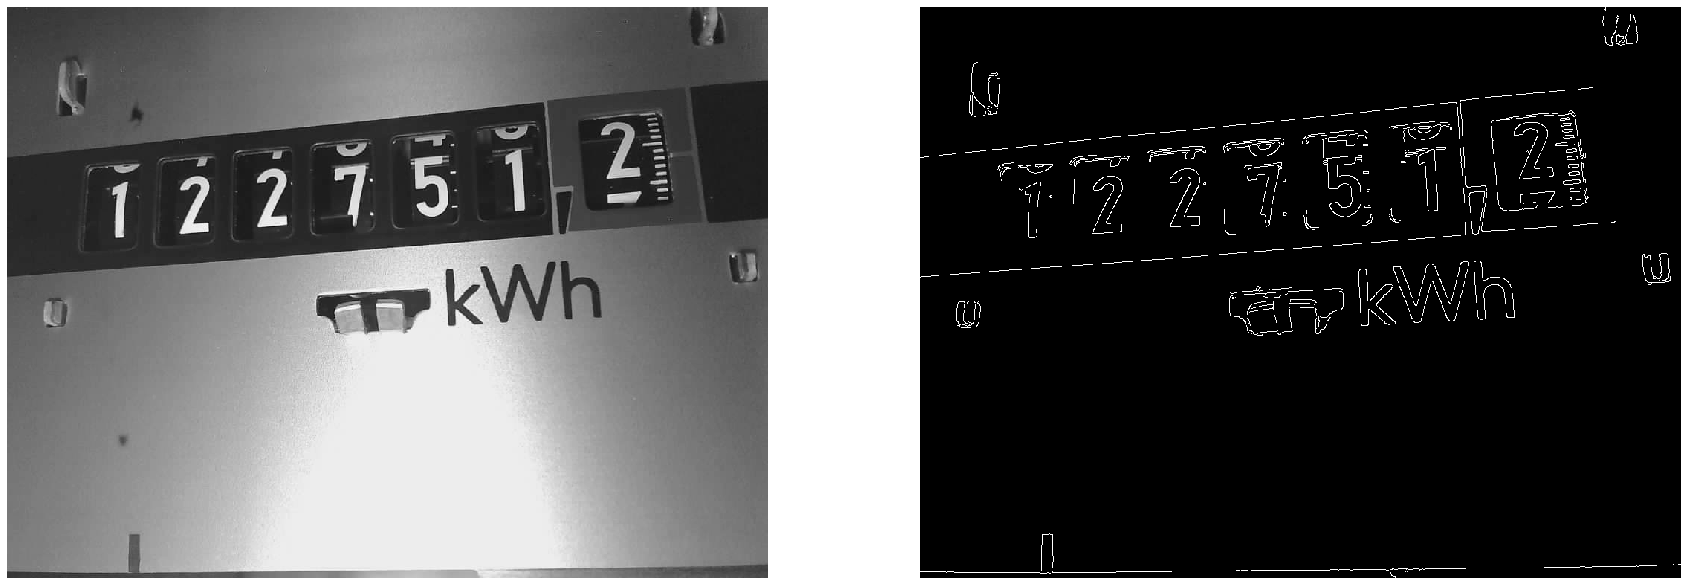

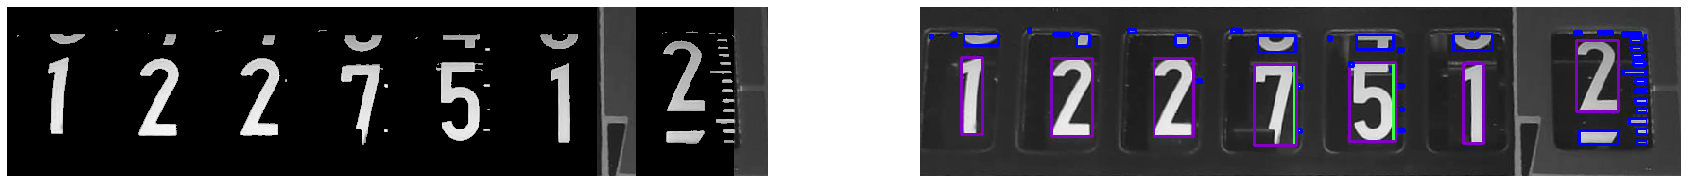

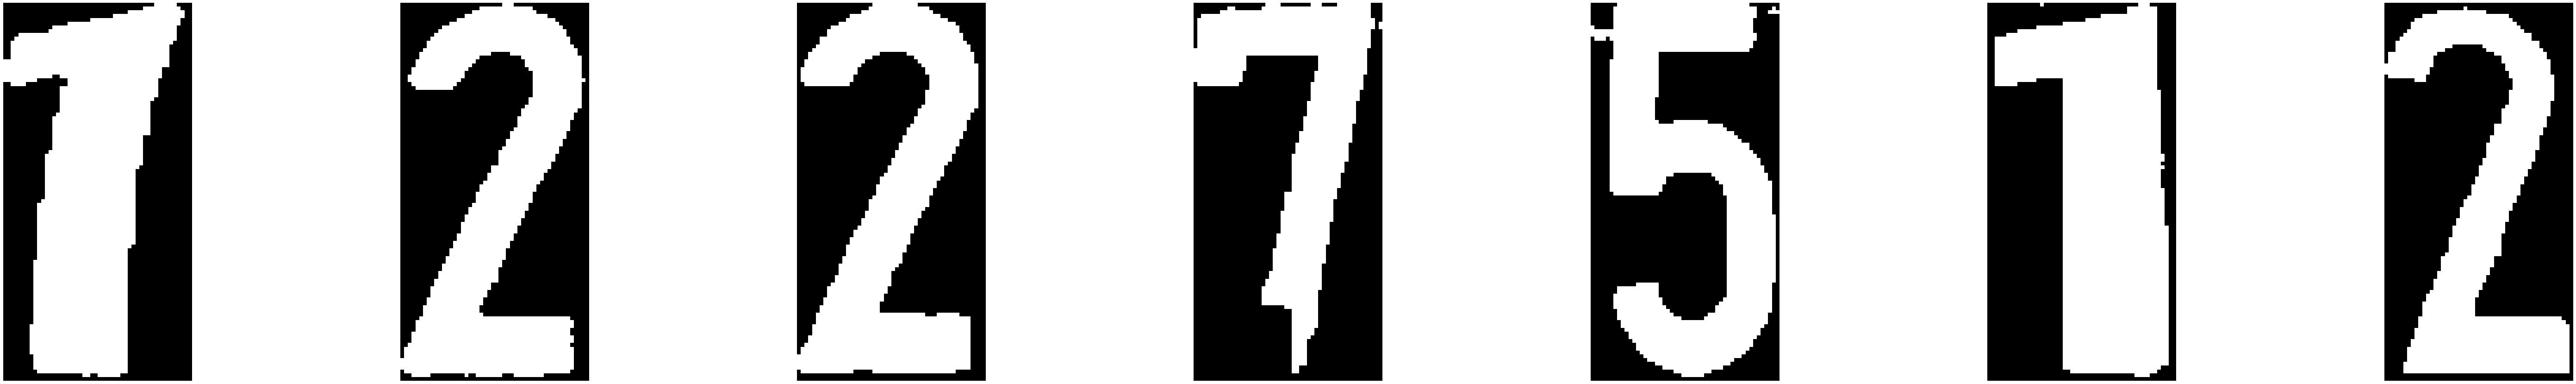

In [4]:
img = aquireGrayscaleImage("http://espcam1/snapshot.jpg")
#img = aquireGrayscaleImage(f"file://{os.path.abspath('imgs/image.jpg')}")
edges = applyEdgeFilter(img, area_blurr, area_low, area_ratio)
contour = findLargestSquare(edges)

show([img, edges])

if contour is not None:
    counter = undoPerspectiveDistortion(img, contour)
    boxes = cv2.cvtColor(counter, cv2.COLOR_GRAY2BGR)
    digits, imgs = findDigits(counter, digit_blurr, digit_low, digit_ratio, patterns, boxes=boxes)
    #box = img.copy()
    #cv2.drawContours(box, [contour], 0, (255, 255, 255), 2) # white box around distorted image
    show([counter, boxes])
    
    show([i for i in imgs.values()])

    num = numberFromDigits(digits)
    
    print(num)

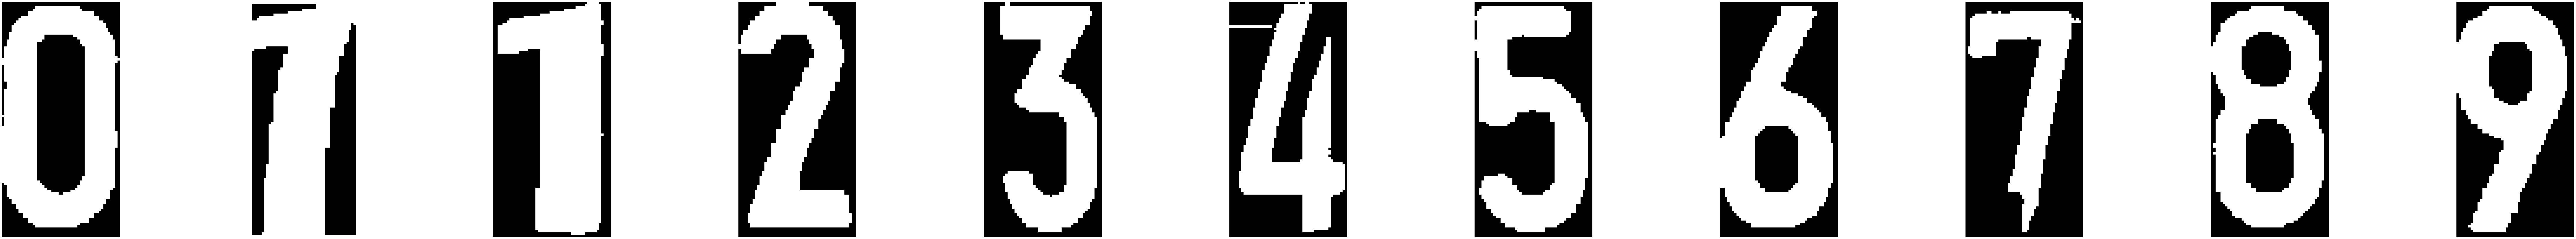

In [5]:
show([d for d in patterns.values()])

In [6]:
for d in sorted(imgs):
    digit, sim = getSimilarity(imgs[d], patterns)
    print(f"{d}. digit is '{digit}' with {sim:.2f} probability")

1. digit is '1' with 0.84 probability
2. digit is '2' with 0.86 probability
3. digit is '2' with 0.89 probability
4. digit is '7' with 0.91 probability
5. digit is '5' with 0.85 probability
6. digit is '1' with 0.96 probability
7. digit is '2' with 0.87 probability


In [7]:
def updatePattern(val, pos, ext=''):
    fname='digits'
    p = {}
    for pat in patterns:
        p[pat] = patterns[pat]
    p[f'd{val}{ext}'] = imgs[pos]
    np.savez_compressed(fname, d0=p['d0'], d1=p['d1'], d1b=p['d1b'], d2=p['d2'], d3=p['d3'], d4=p['d4'], d5=p['d5'], d6=p['d6'], d7=p['d7'], d8=p['d8'], d9=p['d9'])
    return readDigits(fname + '.npz')

In [8]:
# patterns = updatePattern(1, 6, 'b')